# Section 1: Setup and Kaggle API Configuration


In [1]:
%%writefile kaggle.json
{"username":"sairamparshi07","key":"a07ce4e9f16b95b9b0c358f5b12deec7"}

Writing kaggle.json


In [2]:
import os

def download_kaggle_dataset(dataset_path):
    # Kaggle dataset path example: 'grassknoted/asl-alphabet'
    # Ensure Kaggle API is installed
    os.system('pip install -q kaggle')

    # Check for kaggle.json file
    if not os.path.isfile('kaggle.json'):
        print("kaggle.json file not found. Please upload it.")
        return

    # Set up Kaggle directory and permissions
    os.system('mkdir -p ~/.kaggle')
    os.system('cp kaggle.json ~/.kaggle/')
    os.system('chmod 600 ~/.kaggle/kaggle.json')

    # Download the dataset
    os.system(f'kaggle datasets download -d {dataset_path}')

    # Unzip the dataset
    zip_file = f'{dataset_path.split("/")[-1]}.zip'
    os.system(f'unzip -q {zip_file}')




# Section 2: Download and Unzip Dataset


In [3]:
# Example Usage:
download_kaggle_dataset('mohamedhanyyy/chest-ctscan-images')


In [9]:

!dir /content/Data/test -ls


total 16
4 drwxr-xr-x 2 root root 4096 Mar  9 05:53 Adenocarcinoma
4 drwxr-xr-x 2 root root 4096 Mar  9 05:53 LargeCellCarcinoma
4 drwxr-xr-x 2 root root 4096 Mar  9 05:53 Normal
4 drwxr-xr-x 2 root root 4096 Mar  9 05:53 SquamousCellCarcinoma


In [5]:
import os

def rename_directories(base_path):
    # Dictionary to map old names to new names
    name_mapping = {
        "adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib": "Adenocarcinoma",
        "large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa": "LargeCellCarcinoma",
        "normal": "Normal",
        "squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa": "SquamousCellCarcinoma"
    }

    # Renaming process
    for old_name, new_name in name_mapping.items():
        old_path = os.path.join(base_path, old_name)
        new_path = os.path.join(base_path, new_name)

        if os.path.exists(old_path):
            os.rename(old_path, new_path)
            print(f"Renamed '{old_name}' to '{new_name}'")
        else:
            print(f"Directory '{old_name}' does not exist.")

# Example usage
rename_directories("/content/Data/train")


Renamed 'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib' to 'Adenocarcinoma'
Renamed 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa' to 'LargeCellCarcinoma'
Renamed 'normal' to 'Normal'
Renamed 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa' to 'SquamousCellCarcinoma'


In [8]:
rename_directories("/content/Data/valid")

Renamed 'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib' to 'Adenocarcinoma'
Renamed 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa' to 'LargeCellCarcinoma'
Renamed 'normal' to 'Normal'
Renamed 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa' to 'SquamousCellCarcinoma'


In [7]:
import os

def rename_directories_test(base_path):
    # Dictionary to map old names to new names for the test directory
    name_mapping = {
        "adenocarcinoma": "Adenocarcinoma",
        "large.cell.carcinoma": "LargeCellCarcinoma",
        "normal": "Normal",
        "squamous.cell.carcinoma": "SquamousCellCarcinoma"
    }

    # Renaming process
    for old_name, new_name in name_mapping.items():
        old_path = os.path.join(base_path, old_name)
        new_path = os.path.join(base_path, new_name)

        if os.path.exists(old_path):
            os.rename(old_path, new_path)
            print(f"Renamed '{old_name}' to '{new_name}'")
        else:
            print(f"Directory '{old_name}' does not exist.")

# Example usage for the test directory
rename_directories_test("/content/Data/test")


Renamed 'adenocarcinoma' to 'Adenocarcinoma'
Renamed 'large.cell.carcinoma' to 'LargeCellCarcinoma'
Renamed 'normal' to 'Normal'
Renamed 'squamous.cell.carcinoma' to 'SquamousCellCarcinoma'


# Section 3: Import Libraries


In [10]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from PIL import Image
import numpy as np
import warnings

# Configurations and settings
warnings.filterwarnings("ignore")
plt.style.use('seaborn-darkgrid')


# Section 4: Data Loading and Preprocessing


In [28]:
# Function to load and structure dataset
def load_dataset(path):
    classes, class_paths = [], []
    for file in os.listdir(path):
        label_dir = os.path.join(path, file)
        images = os.listdir(label_dir)
        for image in images:
            image_path = os.path.join(label_dir, image)
            class_paths.append(image_path)
            classes.append(file)
    return pd.DataFrame({'Class Path': class_paths, 'Class': classes})

# Load training and test data
tr_df = load_dataset('/content/Data/train')
ts_df = load_dataset('/content/Data/test')

# Split data into train, test, valid
#valid_df, ts_df = train_test_split(ts_df, train_size=0.5, random_state=20)

valid_df = load_dataset('/content/Data/valid')

In [29]:
# Data augmentation and preprocessing
batch_size = 16
img_size = (299, 299)

tr_gen = ImageDataGenerator(brightness_range=(0.8, 1.2)).flow_from_dataframe(
    tr_df, x_col='Class Path', y_col='Class', batch_size=batch_size, target_size=img_size)

valid_gen = ImageDataGenerator().flow_from_dataframe(
    valid_df, x_col='Class Path', y_col='Class', batch_size=batch_size, target_size=img_size)

ts_gen = ImageDataGenerator().flow_from_dataframe(
    ts_df, x_col='Class Path', y_col='Class', batch_size=batch_size, target_size=img_size, shuffle=False)

Found 613 validated image filenames belonging to 4 classes.
Found 72 validated image filenames belonging to 4 classes.
Found 315 validated image filenames belonging to 4 classes.


# Section 5: Exploratory Data Analysis (EDA) with Advanced Plots


In [30]:
!dir '/content/Data/test'

Adenocarcinoma	LargeCellCarcinoma  Normal  SquamousCellCarcinoma


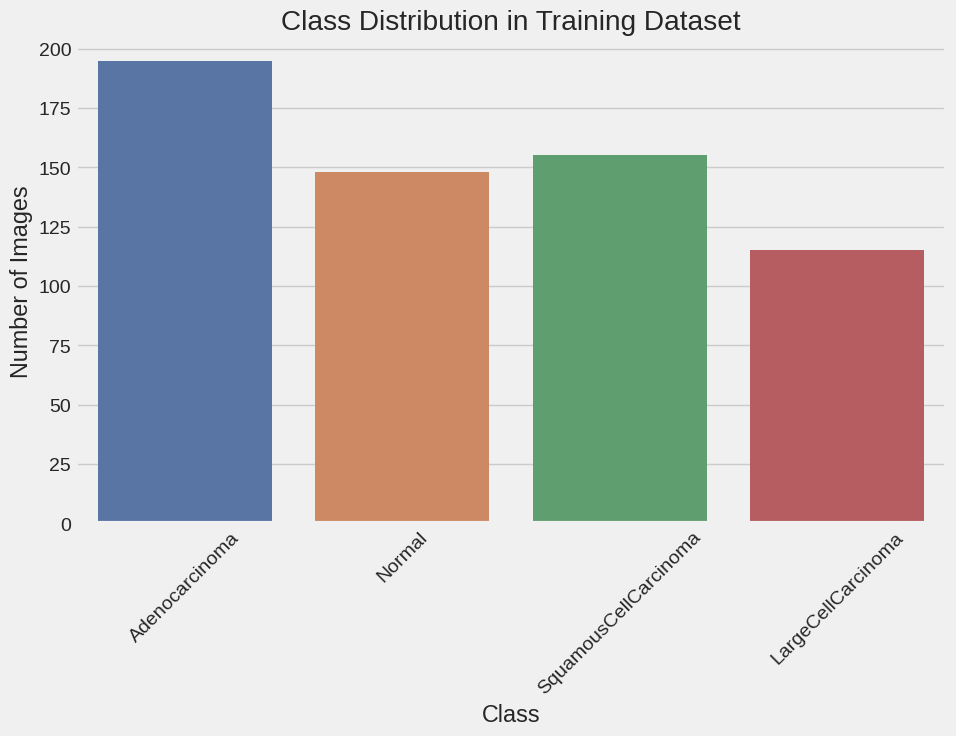

In [31]:
def plot_class_distribution(directory, title):
    """
    Plots the distribution of classes in the given directory.

    Args:
    directory (str): The path to the directory containing sub-folders for each class.
    """
    # Count the number of images in each class
    class_counts = {}
    for class_name in os.listdir(directory):
        class_dir = os.path.join(directory, class_name)
        if os.path.isdir(class_dir):
            class_counts[class_name] = len(os.listdir(class_dir))

    # Create a bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette="deep")
    plt.title(title)
    plt.xlabel("Class")
    plt.ylabel("Number of Images")
    plt.xticks(rotation=45)
    plt.show()


plot_class_distribution("/content/Data/train", title="Class Distribution in Training Dataset")


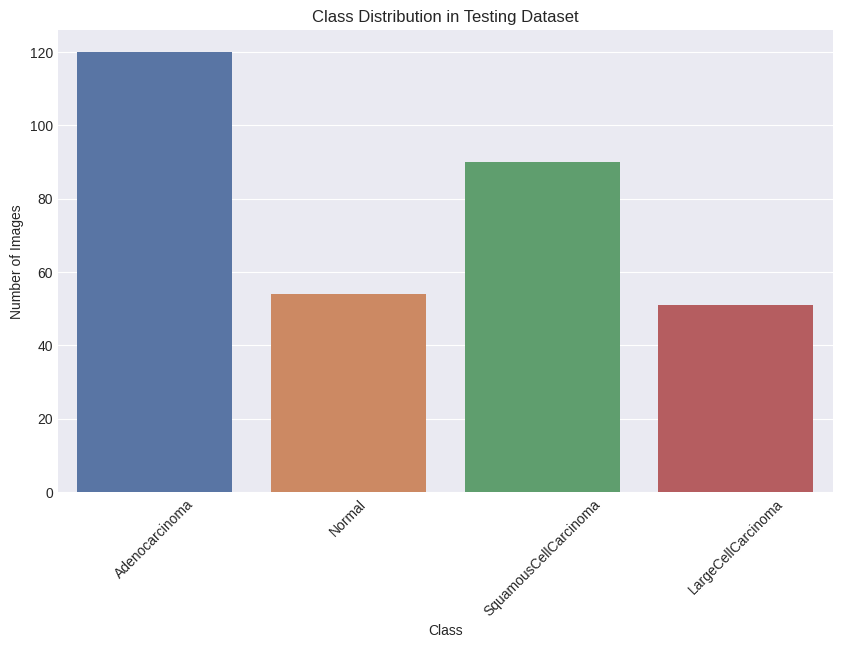

In [16]:
plot_class_distribution("/content/Data/test", title="Class Distribution in Testing Dataset")

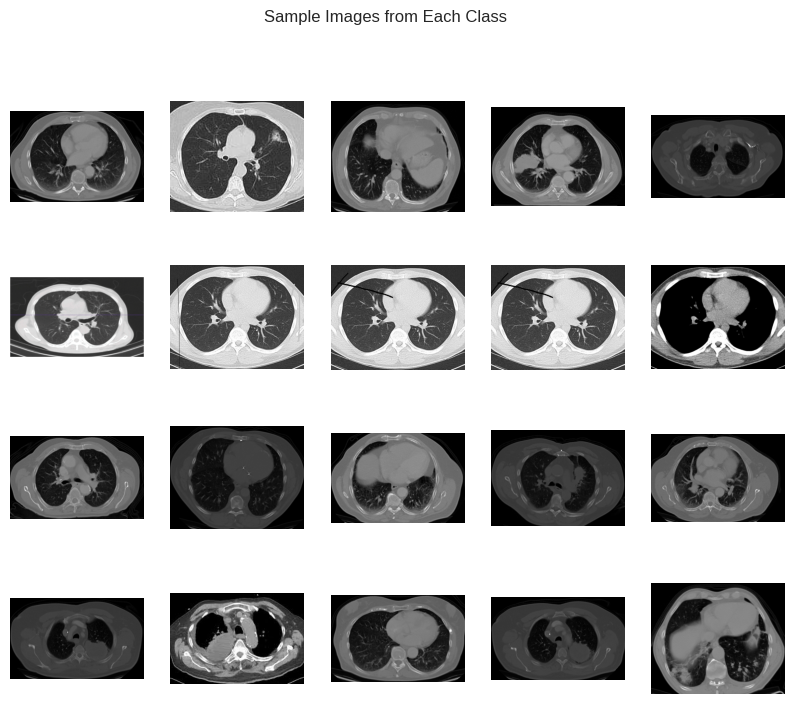

In [17]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

def plot_sample_images(directory, samples_per_class=5):
    """
    Displays a grid of sample images from each class in the directory.

    Args:
    directory (str): The path to the directory containing sub-folders for each class.
    samples_per_class (int): Number of sample images per class to display.
    """
    classes = os.listdir(directory)
    fig, axes = plt.subplots(len(classes), samples_per_class, figsize=(samples_per_class * 2, len(classes) * 2))

    for i, class_name in enumerate(classes):
        class_dir = os.path.join(directory, class_name)
        for j, image_name in enumerate(os.listdir(class_dir)[:samples_per_class]):
            img = Image.open(os.path.join(class_dir, image_name))
            axes[i, j].imshow(img, cmap='gray')
            axes[i, j].axis('off')
            if j == 0:
                axes[i, j].set_ylabel(class_name)

    plt.suptitle("Sample Images from Each Class")
    plt.show()

# Example usage:
plot_sample_images("/content/Data/train")


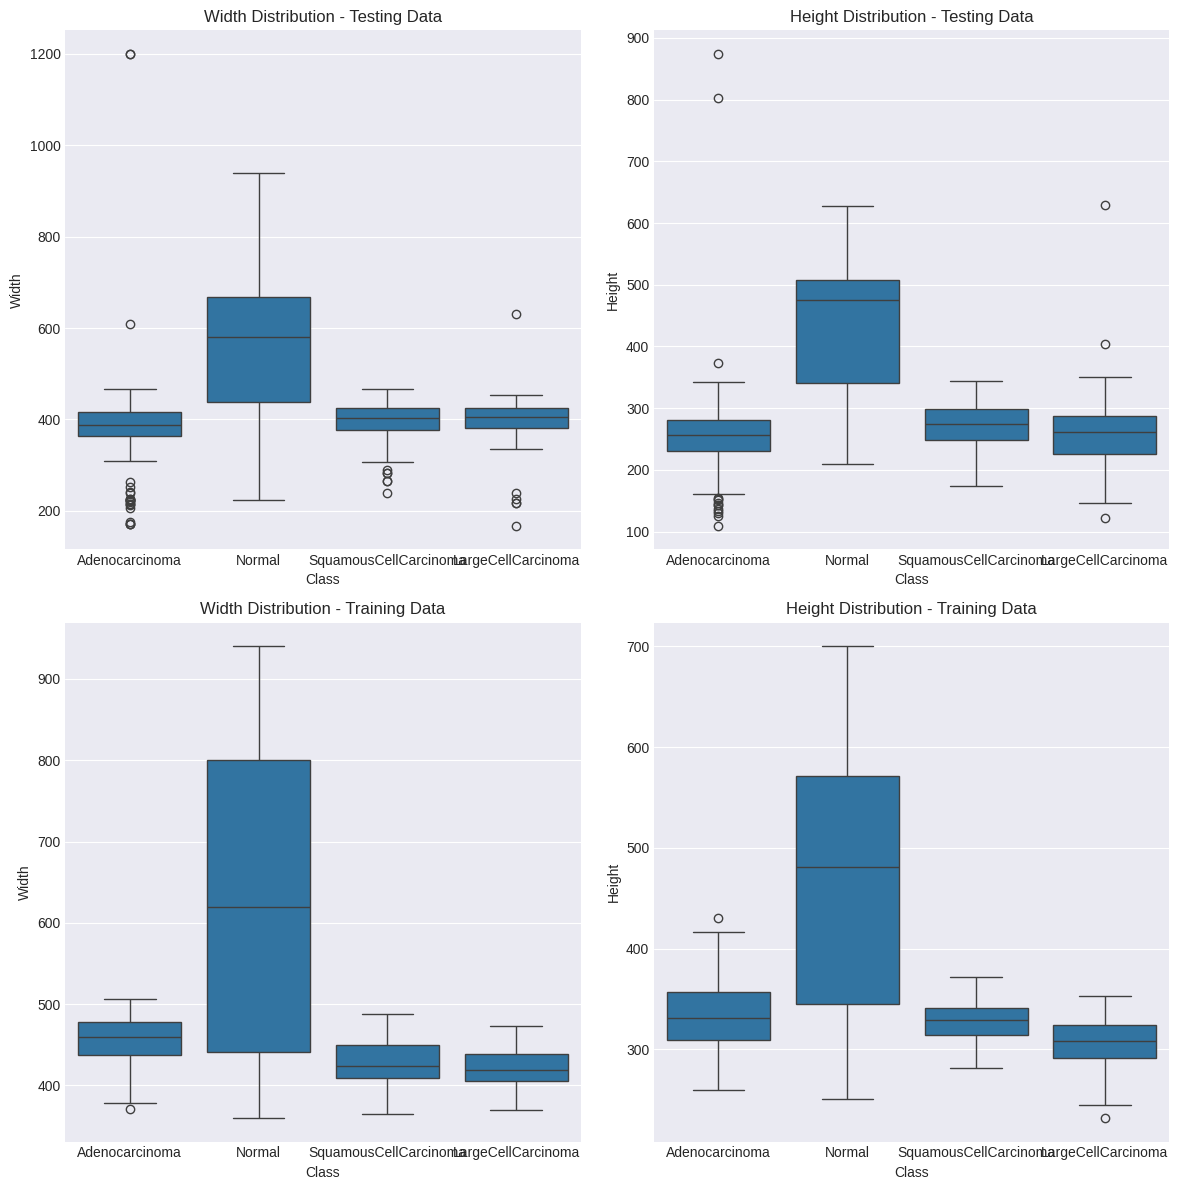

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image
import pandas as pd

def plot_image_resolutions(testing_dir, training_dir):
    # Function to extract resolutions
    def extract_resolutions(directory):
        resolutions = []
        labels = []
        for class_name in os.listdir(directory):
            class_dir = os.path.join(directory, class_name)
            if os.path.isdir(class_dir):
                for img_name in os.listdir(class_dir):
                    with Image.open(os.path.join(class_dir, img_name)) as img:
                        resolutions.append(img.size)
                        labels.append(class_name)
        return pd.DataFrame(resolutions, columns=['Width', 'Height']), labels

    # Extract resolutions for testing and training data
    df_testing, labels_testing = extract_resolutions(testing_dir)
    df_testing['Class'] = labels_testing

    df_training, labels_training = extract_resolutions(training_dir)
    df_training['Class'] = labels_training

    # Plotting
    fig, axes = plt.subplots(2, 2, figsize=(12, 12))

    # Testing data plots
    sns.boxplot(x='Class', y='Width', data=df_testing, ax=axes[0, 0])
    axes[0, 0].set_title('Width Distribution - Testing Data')
    axes[0, 0].set_xlabel('Class')
    axes[0, 0].set_ylabel('Width')

    sns.boxplot(x='Class', y='Height', data=df_testing, ax=axes[0, 1])
    axes[0, 1].set_title('Height Distribution - Testing Data')
    axes[0, 1].set_xlabel('Class')
    axes[0, 1].set_ylabel('Height')

    # Training data plots
    sns.boxplot(x='Class', y='Width', data=df_training, ax=axes[1, 0])
    axes[1, 0].set_title('Width Distribution - Training Data')
    axes[1, 0].set_xlabel('Class')
    axes[1, 0].set_ylabel('Width')

    sns.boxplot(x='Class', y='Height', data=df_training, ax=axes[1, 1])
    axes[1, 1].set_title('Height Distribution - Training Data')
    axes[1, 1].set_xlabel('Class')
    axes[1, 1].set_ylabel('Height')

    plt.tight_layout()
    plt.show()

# Example usage:
plot_image_resolutions("/content/Data/train", "/content/Data/test")


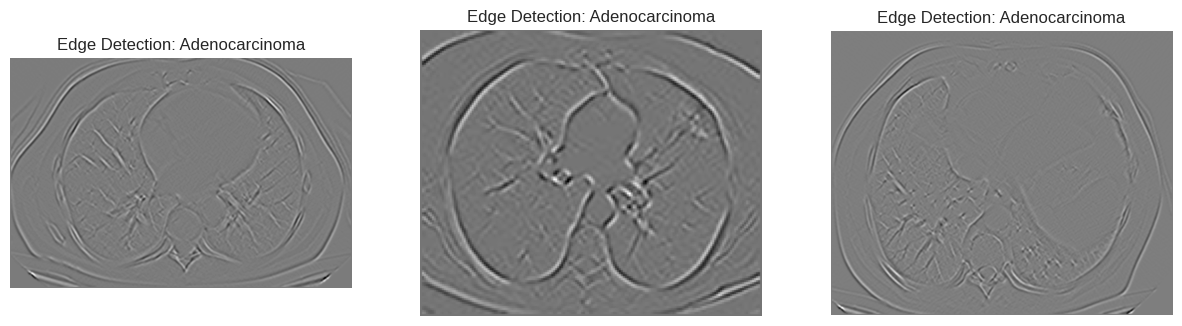

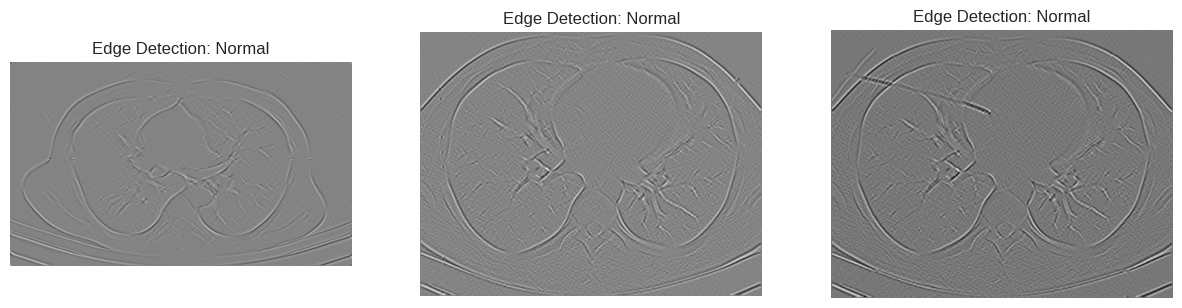

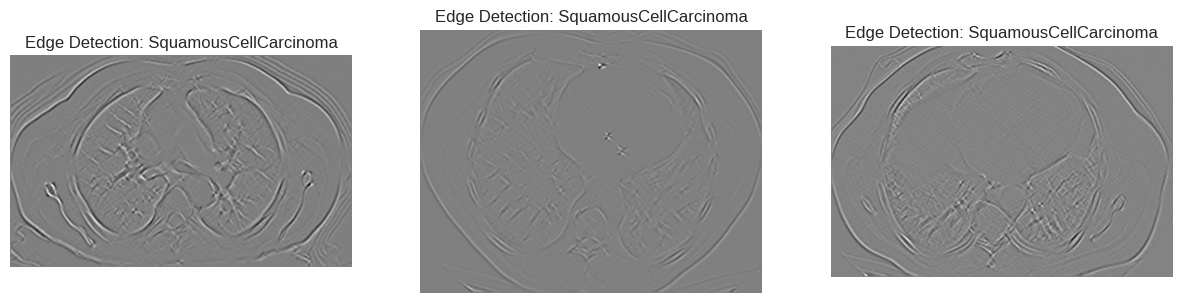

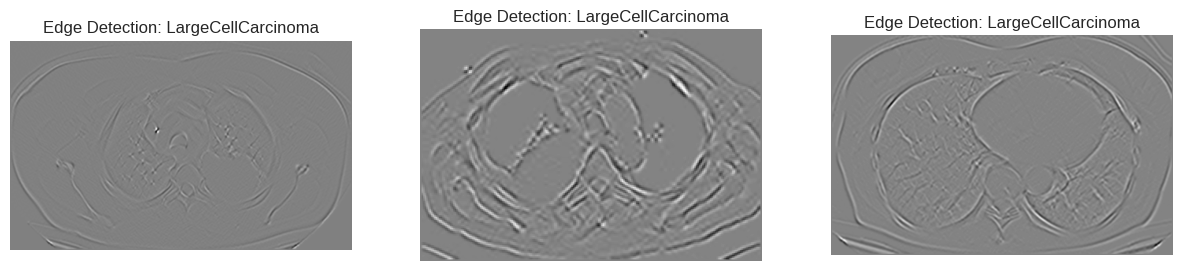

In [19]:
import cv2

def plot_edge_detection(directory, samples_per_class=3):
    for class_name in os.listdir(directory):
        class_dir = os.path.join(directory, class_name)
        if os.path.isdir(class_dir):
            fig, axes = plt.subplots(1, samples_per_class, figsize=(15, 5))
            for i, img_name in enumerate(os.listdir(class_dir)[:samples_per_class]):
                img_path = os.path.join(class_dir, img_name)
                img = cv2.imread(img_path, 0)
                edges = cv2.Sobel(img, cv2.CV_64F, 1, 1, ksize=5)

                axes[i].imshow(edges, cmap='gray')
                axes[i].set_title(f'Edge Detection: {class_name}')
                axes[i].axis('off')
            plt.show()

plot_edge_detection("/content/Data/train")


# Section 6: Building the Deep Learning Model


In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dropout, Dense
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall

# Enable Mixed Precision Training
if tf.config.list_physical_devices('GPU'):
    policy = tf.keras.mixed_precision.Policy('mixed_float16')
    tf.keras.mixed_precision.set_global_policy(policy)
    print('Mixed precision enabled')

# Confirming that GPU is available
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
if not gpu_devices:
    print('No GPU found. Using CPU')
else:
    print(f'GPUs found: {gpu_devices}')
    tf.config.experimental.set_memory_growth(gpu_devices[0], True)




Mixed precision enabled
GPUs found: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [33]:
img_shape=(299,299,3)
base_model = tf.keras.applications.Xception(include_top= False, weights= "imagenet",
                            input_shape= img_shape, pooling= 'max')

# for layer in base_model.layers:
#     layer.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate= 0.3),
    Dense(128, activation= 'relu'),
    Dropout(rate= 0.25),
    Dense(4, activation= 'softmax')
])

model.compile(Adamax(learning_rate= 0.001),
              loss= 'categorical_crossentropy',
              metrics= ['accuracy',
                        Precision(),
                        Recall()])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dropout_2 (Dropout)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               262272    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 516       
                                                                 
Total params: 21124268 (80.58 MB)
Trainable params: 21

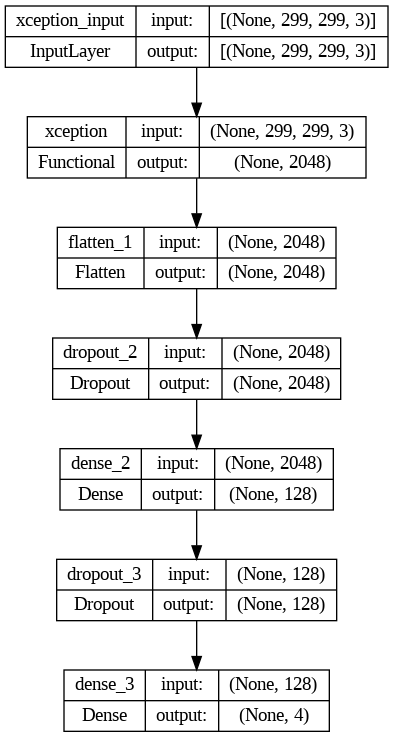

In [34]:
tf.keras.utils.plot_model(model, show_shapes=True)

# Section 7: Model Training


In [35]:
# Train the model
hist = model.fit(tr_gen, epochs=10, validation_data=valid_gen, shuffle=False)


Epoch 1/10
39/39 [==============================] - 27s 307ms/step - loss: 1.1822 - accuracy: 0.5400 - precision_1: 0.6297 - recall_1: 0.3246 - val_loss: 1.8289 - val_accuracy: 0.5417 - val_precision_1: 0.5352 - val_recall_1: 0.5278
Epoch 2/10
39/39 [==============================] - 7s 173ms/step - loss: 0.3774 - accuracy: 0.8548 - precision_1: 0.8883 - recall_1: 0.8303 - val_loss: 3.0360 - val_accuracy: 0.3611 - val_precision_1: 0.3611 - val_recall_1: 0.3611
Epoch 3/10
39/39 [==============================] - 7s 173ms/step - loss: 0.1901 - accuracy: 0.9396 - precision_1: 0.9422 - recall_1: 0.9315 - val_loss: 1.0953 - val_accuracy: 0.6389 - val_precision_1: 0.6479 - val_recall_1: 0.6389
Epoch 4/10
39/39 [==============================] - 7s 174ms/step - loss: 0.0859 - accuracy: 0.9723 - precision_1: 0.9739 - recall_1: 0.9723 - val_loss: 1.2989 - val_accuracy: 0.7361 - val_precision_1: 0.7465 - val_recall_1: 0.7361
Epoch 5/10
39/39 [==============================] - 7s 173ms/step - los

In [36]:
from google.colab import files

# Save the model to a file
model_file_name = 'trained_model.h5'
model.save(model_file_name)

# Automatically download the file to your local machine
files.download(model_file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Section 8: Visualize Model Performance


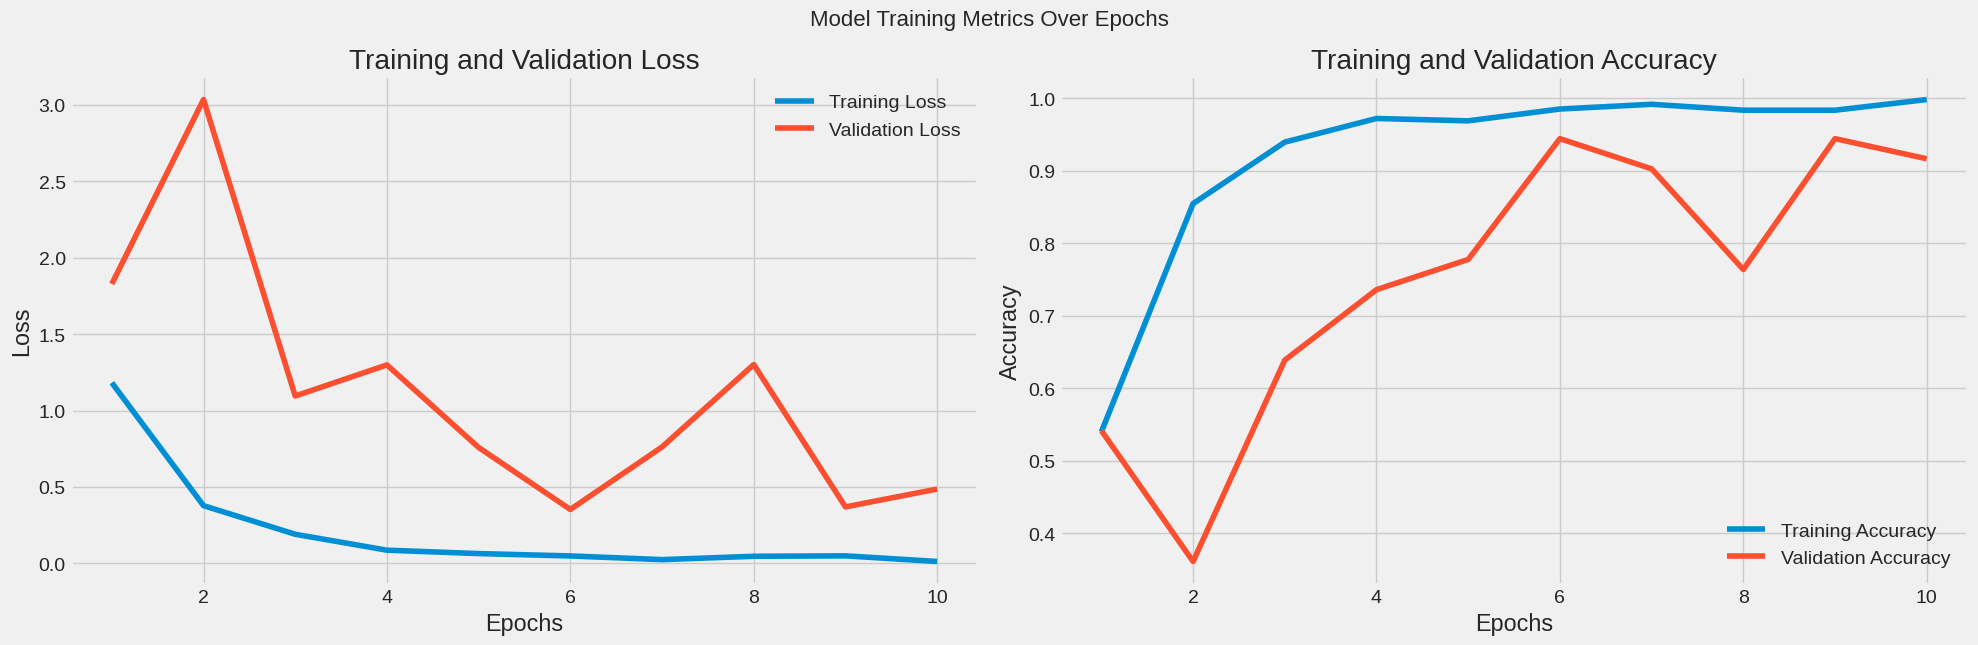

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_metrics(history):
    # Extracting available metrics from history
    tr_acc = history.get('accuracy', [])
    tr_loss = history.get('loss', [])
    val_acc = history.get('val_accuracy', [])
    val_loss = history.get('val_loss', [])

    # Setting the plot style
    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(20, 12))

    # Plotting Loss
    plt.subplot(2, 2, 1)
    if tr_loss and val_loss:
        sns.lineplot(x=range(1, len(tr_loss) + 1), y=tr_loss, label='Training Loss')
        sns.lineplot(x=range(1, len(val_loss) + 1), y=val_loss, label='Validation Loss')
        plt.title('Training and Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

    # Plotting Accuracy
    plt.subplot(2, 2, 2)
    if tr_acc and val_acc:
        sns.lineplot(x=range(1, len(tr_acc) + 1), y=tr_acc, label='Training Accuracy')
        sns.lineplot(x=range(1, len(val_acc) + 1), y=val_acc, label='Validation Accuracy')
        plt.title('Training and Validation Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

    # Check and plot Precision if available
    if 'precision' in history and 'val_precision' in history:
        tr_per = history['precision']
        val_per = history['val_precision']
        plt.subplot(2, 2, 3)
        sns.lineplot(x=range(1, len(tr_per) + 1), y=tr_per, label='Training Precision')
        sns.lineplot(x=range(1, len(val_per) + 1), y=val_per, label='Validation Precision')
        plt.title('Training and Validation Precision')
        plt.xlabel('Epochs')
        plt.ylabel('Precision')
        plt.legend()

    # Check and plot Recall if available
    if 'recall' in history and 'val_recall' in history:
        tr_recall = history['recall']
        val_recall = history['val_recall']
        plt.subplot(2, 2, 4)
        sns.lineplot(x=range(1, len(tr_recall) + 1), y=tr_recall, label='Training Recall')
        sns.lineplot(x=range(1, len(val_recall) + 1), y=val_recall, label='Validation Recall')
        plt.title('Training and Validation Recall')
        plt.xlabel('Epochs')
        plt.ylabel('Recall')
        plt.legend()

    # Adding supertitle
    plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
    plt.tight_layout()
    plt.show()

plot_metrics(hist.history)


# Section 9: Testing and Evaluation


20/20 [==============================] - 3s 137ms/step - loss: 0.3084 - accuracy: 0.9238 - precision_1: 0.9297 - recall_1: 0.9238
Train Loss:  0.0033322081435471773
Train Accuracy:  0.9983686804771423
--------------------
Validation Loss:  0.4863794147968292
Validation Accuracy:  0.9166666865348816
--------------------
Test Loss:  0.3083817660808563
Test Accuracy:  0.9238095283508301
20/20 [==============================] - 3s 88ms/step


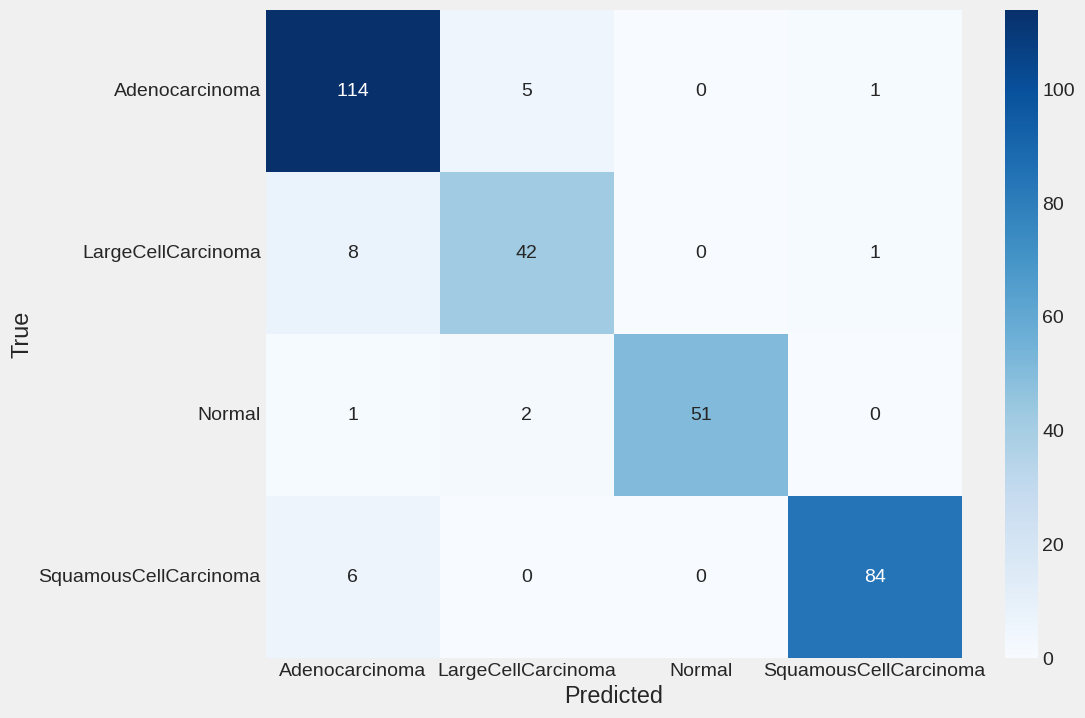

              precision    recall  f1-score   support

           0       0.88      0.95      0.92       120
           1       0.86      0.82      0.84        51
           2       1.00      0.94      0.97        54
           3       0.98      0.93      0.95        90

    accuracy                           0.92       315
   macro avg       0.93      0.91      0.92       315
weighted avg       0.93      0.92      0.92       315



In [38]:
# Evaluate the model on test data
train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(ts_gen, verbose=1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

# Confusion matrix and classification report
preds = model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)
cm = confusion_matrix(ts_gen.classes, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=tr_gen.class_indices, yticklabels=tr_gen.class_indices)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print(classification_report(ts_gen.classes, y_pred))
